# **Problem**

## **Dataset**

The dataset choosen for this experiment is hotel booking dataset. The dataset contains 43917 samples and 32 columns. The target variable in the dataset is **is_canceled**



## **Exercises**

### **Exercise 1**

**Importing necessary libraries**

In [41]:
# Your Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Exercise 2**

**Load the dataset**

In [3]:
# # Your Code Here
# data = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv',on_bad_lines='skip')

# Your Code Here
FILE_PATH = "/content/drive/MyDrive/hotel_bookings.csv"
data = pd.read_csv(FILE_PATH)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.drop_duplicates(inplace= False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### **Exercise 3**

**Deal with null values appropriately**

In [5]:
data.isnull().sum()
# data.fillna(data.mode().iloc[0], inplace=True)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
data['children'] = data['children'].fillna(method='ffill')
data['country'] = data['country'].fillna(method='ffill')
data['agent'] = data['agent'].fillna(method='bfill')
data['company'] = data['company'].fillna(method='bfill')
data['company'] = data['company'].fillna(method='ffill')

In [9]:
data['country'].fillna(data.country.mode().to_string(), inplace=True)
data['children'].fillna(round(data.children.mean()), inplace=True)

In [10]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### **Exercise 4**

**Convert children, company, agent features to int64 datatype**

In [11]:
# Your Code Here
data[['children', 'company', 'agent']] = data[['children', 'company', 'agent']].astype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

### **Exercise 5**

**What is the percentage of booking for each year based and split it by hotel types Resort and City Hotels?**

**Show the insights in Plot**

NOTE: USE ONLY BOOKINGS WHICH ARE NOT CANCELLED

In [13]:
data_not_canceled = data[data['is_canceled'] == 0]

In [14]:
def get_count(series):
    series = series.value_counts()
    x = series.index  # unique values
    y = series/series.sum()*100

    return x.values, y.values

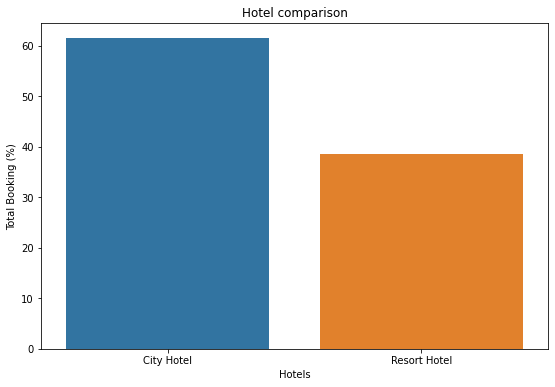

In [15]:
x, y = get_count(data_not_canceled['hotel'])
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.barplot(x, y)
plt.xlabel('Hotels')
plt.ylabel('Total Booking (%)')
plt.title('Hotel comparison')
plt.show()
plt.close()

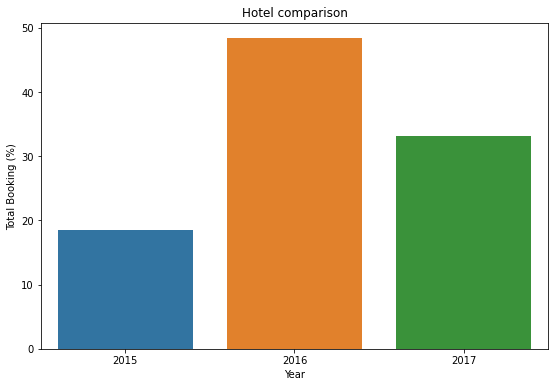

In [16]:
x,y = get_count(data_not_canceled['arrival_date_year'])
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.barplot(x, y)
plt.xlabel('Year')
plt.ylabel('Total Booking (%)')
plt.title('Hotel comparison')
plt.show()
plt.close()

### **Exercise 6**

**Remove unwanted columns**

In [17]:
# Your Code Here
data = data.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled','reservation_status'],axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   lead_time                    119390 non-null  int64  
 3   stays_in_weekend_nights      119390 non-null  int64  
 4   stays_in_week_nights         119390 non-null  int64  
 5   adults                       119390 non-null  int64  
 6   children                     119390 non-null  int64  
 7   babies                       119390 non-null  int64  
 8   meal                         119390 non-null  object 
 9   country                      119390 non-null  object 
 10  market_segment               119390 non-null  object 
 11  distribution_channel         119390 non-null  object 
 12  is_repeated_guest            119390 non-null  int64  
 13 

### **Exercise 7**

**Convert all categorical data to numeric data using LabelEncoder**

In [35]:
# Your Code Here

lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'market_segment', 'distribution_channel', 'country']
for item in var:
    data[item] = lb.fit_transform(data[item])
df = pd.get_dummies(data, columns=['hotel', 'customer_type', 'deposit_type', 'market_segment', 'distribution_channel', 'country'])

### **Exercise 8**

**Divide the dataset into train and test sets**

In [36]:
# Your Code Here
features = data.drop(['is_canceled'], axis=1)
target = data['is_canceled']

X_train , X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
for each in [X_train, X_test, y_train, y_test]:
    print(each.shape)

(95512, 21)
(23878, 21)
(95512,)
(23878,)


### **Exercise 9**

**Apply Feature Scaling and Logistic Regression to predict the target variable and find the accuracy of the model without hyperparameter tuning. Why SVM and KNN should not be implemented?**

In [37]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [45]:
lr_model = LogisticRegression()
lr_model.fit(X_train_mm, y_train)

train_preds = lr_model.predict(X_train_mm)
test_preds = lr_model.predict(X_test_mm)

print(f"Training Accuracy: {accuracy_score(y_train, train_preds) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_preds) * 100:.2f}%")

Training Accuracy: 77.84%
Testing Accuracy: 77.88%


In [47]:
score = lr_model.score(X_test_mm,y_test) 
print(score*100)

77.8750314096658
